<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session9/Assignment_9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential,Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D
from keras.layers.advanced_activations import ReLU, Softmax
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate, GlobalAveragePooling2D, Input, Lambda, SpatialDropout2D

 Batch Normalization 
 Dropout
 11 beforeMax Pooling
3 max pooling



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

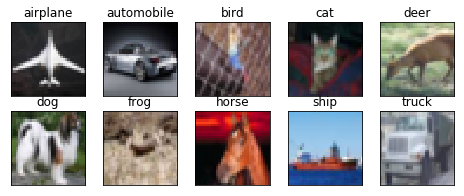

In [44]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [48]:
# Define the model

input = Input(shape=(32, 32, 3,))
#Block1

b1_c1 = Conv2D(24, 3, 3, border_mode='same')(input)#32
b1_c1 = ReLU()(b1_c1)
b1_c1 = BatchNormalization()(b1_c1)
b1_c1 = SpatialDropout2D(0.1)(b1_c1)


#Block2
b1_c2 = Conv2D(48, 3, 3, border_mode='same')(b1_c1)#32
b1_c2 = ReLU()(b1_c2)
b1_c2 = BatchNormalization()(b1_c2)
b1_c2 = SpatialDropout2D(0.1)(b1_c2)

#Trans1
t1_bottle = Conv2D(48, 1, 1, border_mode='same')(b1_c2)#32
t1_bottle = ReLU()(t1_bottle)
t1_bottle = MaxPooling2D(pool_size=(2, 2))(t1_bottle)#16
t1_bottle = BatchNormalization()(t1_bottle)
t1_bottle = SpatialDropout2D(0.1)(t1_bottle)


# Block3
b1_c3 = Conv2D(96, 3, 3, border_mode='same')(t1_bottle)#16
b1_c3 = ReLU()(b1_c3)
b1_c3 = BatchNormalization()(b1_c3)
b1_c3 = SpatialDropout2D(0.1)(b1_c3)

#Block4
b1_c4 = Conv2D(192, 3, 3, border_mode='same')(b1_c3)#16
b1_c4 = ReLU()(b1_c4)

#Trans2
t2_bottle = Conv2D(48, 1, 1, border_mode='same')(b1_c4)#16
t2_bottle = ReLU()(t2_bottle)
t2_bottle = MaxPooling2D(pool_size=(2, 2))(t2_bottle)#8
t2_bottle = BatchNormalization()(t2_bottle)
t2_bottle = SpatialDropout2D(0.1)(t2_bottle)

#Block5
b1_c5 = Conv2D(96, 3, 3, border_mode='same')(t2_bottle)#8
b1_c5 = ReLU()(b1_c5)
b1_c5 = BatchNormalization()(b1_c5)
b1_c5 = SpatialDropout2D(0.1)(b1_c5)


#Block6
b1_c6 = Conv2D(192, 3, 3, border_mode='same')(b1_c5)#8
b1_c6 = ReLU()(b1_c6)



#Trans3
t3_bottle = Conv2D(96, 1, 1, border_mode='same')(b1_c6)#8
t3_bottle = ReLU()(t3_bottle)
t3_bottle = MaxPooling2D(pool_size=(2, 2))(t3_bottle)#4
t3_bottle = BatchNormalization()(t3_bottle)
t3_bottle = SpatialDropout2D(0.1)(t3_bottle)


#Block7
c1_final = Conv2D(192, 3, 3, border_mode='same',name='final_conv')(t3_bottle)
#c1_final = Conv2D(192, 3, 3, border_mode='same')(t3_bottle)
 

reduce_ch = Conv2D(10, (1,1), use_bias=False,)(c1_final)
avg_pool = GlobalAveragePooling2D()(reduce_ch)
output = Softmax()(avg_pool)  

model = Model(inputs=[input], outputs=[output])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1), padding="same")`
/usr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
re_lu_55 (ReLU)              (None, 32, 32, 24)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 24)        96        
_________________________________________________________________
spatial_dropout2d_43 (Spatia (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 48)        10416     
_________________________________________________________________
re_lu_56 (ReLU)              (None, 32, 32, 48)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), name="final_conv", padding="same")`


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/EVA/Session9/saveBest.hdf9"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='auto', save_best_only=True,save_weights_only=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 28s 72ms/step - loss: 1.5070 - acc: 0.4533 - val_loss: 1.1297 - val_acc: 0.6011

Epoch 00001: val_acc improved from -inf to 0.60110, saving model to /content/gdrive/My Drive/EVA/Session9/saveBest.hdf9
Epoch 2/100
390/390 [==============================] - 23s 59ms/step - loss: 1.0862 - acc: 0.6146 - val_loss: 0.8716 - val_acc: 0.6926

Epoch 00002: val_acc improved from 0.60110 to 0.69260, saving model to /content/gdrive/My Drive/EVA/Session9/saveBest.hdf9
Epoch 3/100
390/390 [==============================] - 23s 59ms/step - loss: 0.9233 - acc: 0.6774 - val_loss: 0.7837 - val_acc: 0.7309

Epoch 00003: val_acc improved from 0.69260 to 0.73090, saving model to /content/gdrive/My Drive/EVA/Session9/saveBest.hdf9
Epoch 4/100
390/390 [==============================] - 23s 59ms/step - loss: 0.8348 - acc: 0.7092 - val_loss: 0.7852 - val_acc: 0.7318

Epoch 00004: val_acc improved from 0.73090 to 0.73180, saving model to /content/gdrive/My Drive/EVA/Se

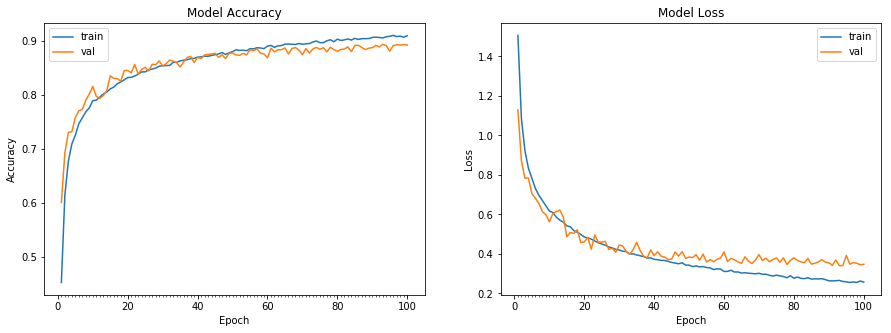

Accuracy on test data is: 89.24


In [53]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             )


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# save model
model.save('/content/gdrive/My Drive/EVA/Session9/saveBest.hdf9')

In [0]:
from keras.models import load_model
# load model back
model = load_model('/content/gdrive/My Drive/EVA/Session9/saveBest.hdf9')

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
re_lu_55 (ReLU)              (None, 32, 32, 24)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 24)        96        
_________________________________________________________________
spatial_dropout2d_43 (Spatia (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 48)        10416     
_________________________________________________________________
re_lu_56 (ReLU)              (None, 32, 32, 48)        0         
__________

In [0]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

[3]
[[1.3729122e-24 1.5071267e-06 0.0000000e+00 9.9999845e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


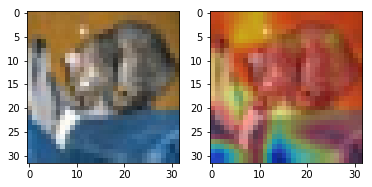

In [121]:
img = test_data[0]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("conv2d_72")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(96):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)

[3]
[[4.7115901e-16 1.0000000e+00 0.0000000e+00 1.1628877e-36 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


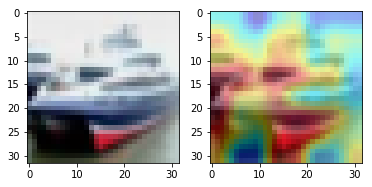

In [125]:
img = test_data[1]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("conv2d_72")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(96):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)

[3]
[[9.9941790e-01 5.8208668e-04 1.0553175e-23 1.0856493e-10 2.5172102e-36
  6.2661823e-17 6.2486852e-32 1.4060324e-23 1.9356283e-23 4.9313467e-13]]


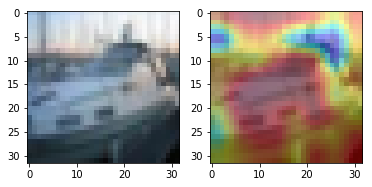

In [126]:
img = test_data[2]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("conv2d_72")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(96):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)

[3]
[[8.9510097e-09 9.8385298e-01 2.6476974e-04 4.4028384e-06 0.0000000e+00
  1.6209121e-37 1.5877893e-02 0.0000000e+00 9.2520948e-19 3.3818090e-19]]


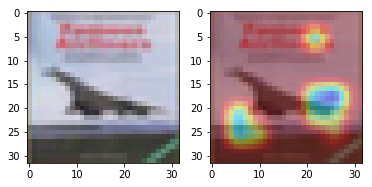

In [127]:
img = test_data[3]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("conv2d_72")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(96):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)

In [0]:
"""import cv2
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

# from google.colab.patches import cv2_imshow
def checkHeatMap(j):
  x = test_data[j]
  #print(x.dtype)
  x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)
  preds = model.predict(x,batch_size=1)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_72")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  #img = (test_data[j])
  heatmap = cv2.resize(heatmap, (x.shape[1], x.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print(img.dtype,heatmap.dtype)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype=cv2.CV_32F)

  concatimg = cv2.hconcat([img,superimposed_img])
  
  return( concatimg)
  """

In [0]:
"""
#image_idx = [208,490,327,559]
#image_idx = [0,1,2,3]
image_idx = range(4)
#four_samples = test_features[:3]

fig = plt.figure(figsize=(8,8))
for i,j in enumerate(image_idx):
  im = checkHeatMap(j)
  
  ax = fig.add_subplot(4, 1, 1 + i) 
  plt.imshow(im)

  
plt.show()
"""